In [401]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'
from math import log2, radians, cos, sqrt

pd.options.display.max_rows = 4000

from matplotlib.colors import ListedColormap

if not os.path.exists("images"):
    os.mkdir("images")

In [402]:
taem_phase_color_map_val = [0, 1, 2, 3]
taem_phase_color_map = ListedColormap(['red', 'blue', 'green', 'orange'])

In [403]:
data_taem = pd.read_csv('taem_log.csv').astype('float64')

data_taem['time'] = data_taem['time'] - data_taem['time'][0]

data_taem.head()

data_taem.dtypes

,iphase,time,alt,speed,mach,hdot,lat,long,psd,x,...,nzc,nztotal,phic_at,dsbc_at,eow,es,en,emep,hdref,Unnamed: 24
0,0.0,0.00,44053.505114,1597.178124,4.908020,-118.226524,29.655205,-78.964010,-90.363973,20147.461021,...,-0.027,0.958151,40.0,1.0,174117.384768,150959.430043,125231.165772,95150.622477,-177.225043,NaN
1,0.0,0.24,44027.433385,1596.585899,4.906742,-118.785470,29.653483,-78.967402,-90.365010,20140.172581,...,-0.049,0.936135,40.0,1.0,173994.876923,150742.995671,125054.555325,95019.030379,-177.154337,NaN
2,0.0,0.44,44001.240922,1595.982616,4.905427,-119.332741,29.652050,-78.970226,-90.366053,20132.890067,...,-0.071,0.914181,40.0,1.0,173870.484594,150526.700893,124878.058786,94887.523154,-177.082470,NaN
3,0.0,0.68,43974.929492,1595.372818,4.904089,-119.877110,29.650330,-78.973615,-90.367110,20125.613483,...,-0.093,0.892297,40.0,1.0,173744.950328,150310.497356,124701.636700,94756.071404,-177.009876,NaN
4,0.0,0.90,43948.498576,1594.758763,4.902738,-120.422028,29.648754,-78.976720,-90.368102,20118.343008,...,-0.115,0.870431,40.0,1.0,173618.642472,150094.387481,124525.291042,94624.676600,-176.936777,NaN


iphase         float64
time           float64
alt            float64
speed          float64
mach           float64
hdot           float64
lat            float64
long           float64
psd            float64
x              float64
y              float64
rpred          float64
herror         float64
psha           float64
dpsac          float64
nzc            float64
nztotal        float64
phic_at        float64
dsbc_at        float64
eow            float64
es             float64
en             float64
emep           float64
hdref          float64
Unnamed: 24    float64
dtype: object

In [404]:
# Create a Scattermapbox trace with colors based on 'alt' column
trace = go.Scattergeo(
    mode='lines+markers',
    lon=data_taem['long'],
    lat=data_taem['lat'],
    line=dict(width=1, color='black'),
    marker=dict(
        size=6,
        color=data_taem['speed'],
        colorscale='Viridis',  # Choose the colorscale you prefer
        cmin=data_taem['speed'].min(),
        cmax=data_taem['speed'].max(),
        colorbar=dict(title='Speed')
    ),
    hovertemplate='Latitude: %{lat:.4f}<br>Longitude: %{lon:.4f}<br>Altitude: %{text}<br>Speed: %{customdata}<extra></extra>',
    text=data_taem['alt'],
    customdata=data_taem['speed']
)

center_lat = (data_taem['lat'].min() + data_taem['lat'].max()) / 2
center_lon = (data_taem['long'].min() + data_taem['long'].max()) / 2


# Create the layout for the 3D globe view
layout = go.Layout(
    title_text='3D Globe View',
    showlegend=False,
    geo=dict(
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        showcountries=True,
        showocean=True,
        lonaxis_gridcolor='rgb(102, 102, 102)',
        lataxis_gridcolor='rgb(102, 102, 102)',
        oceancolor='rgb(204, 230, 255)',
        showcoastlines=True,
        coastlinecolor='rgb(204, 204, 204)',
        showframe=True,

        center=dict(lat=center_lat, lon=center_lon),
        projection=dict(type='orthographic', rotation=dict(lon=center_lon, lat=center_lat, roll=0)),

    )
)

# Create the figure and add the trace
fig_traj = go.Figure(data=[trace], layout=layout)

fig_traj.update_layout(
    autosize=False,
    width=800,
    height=800,)


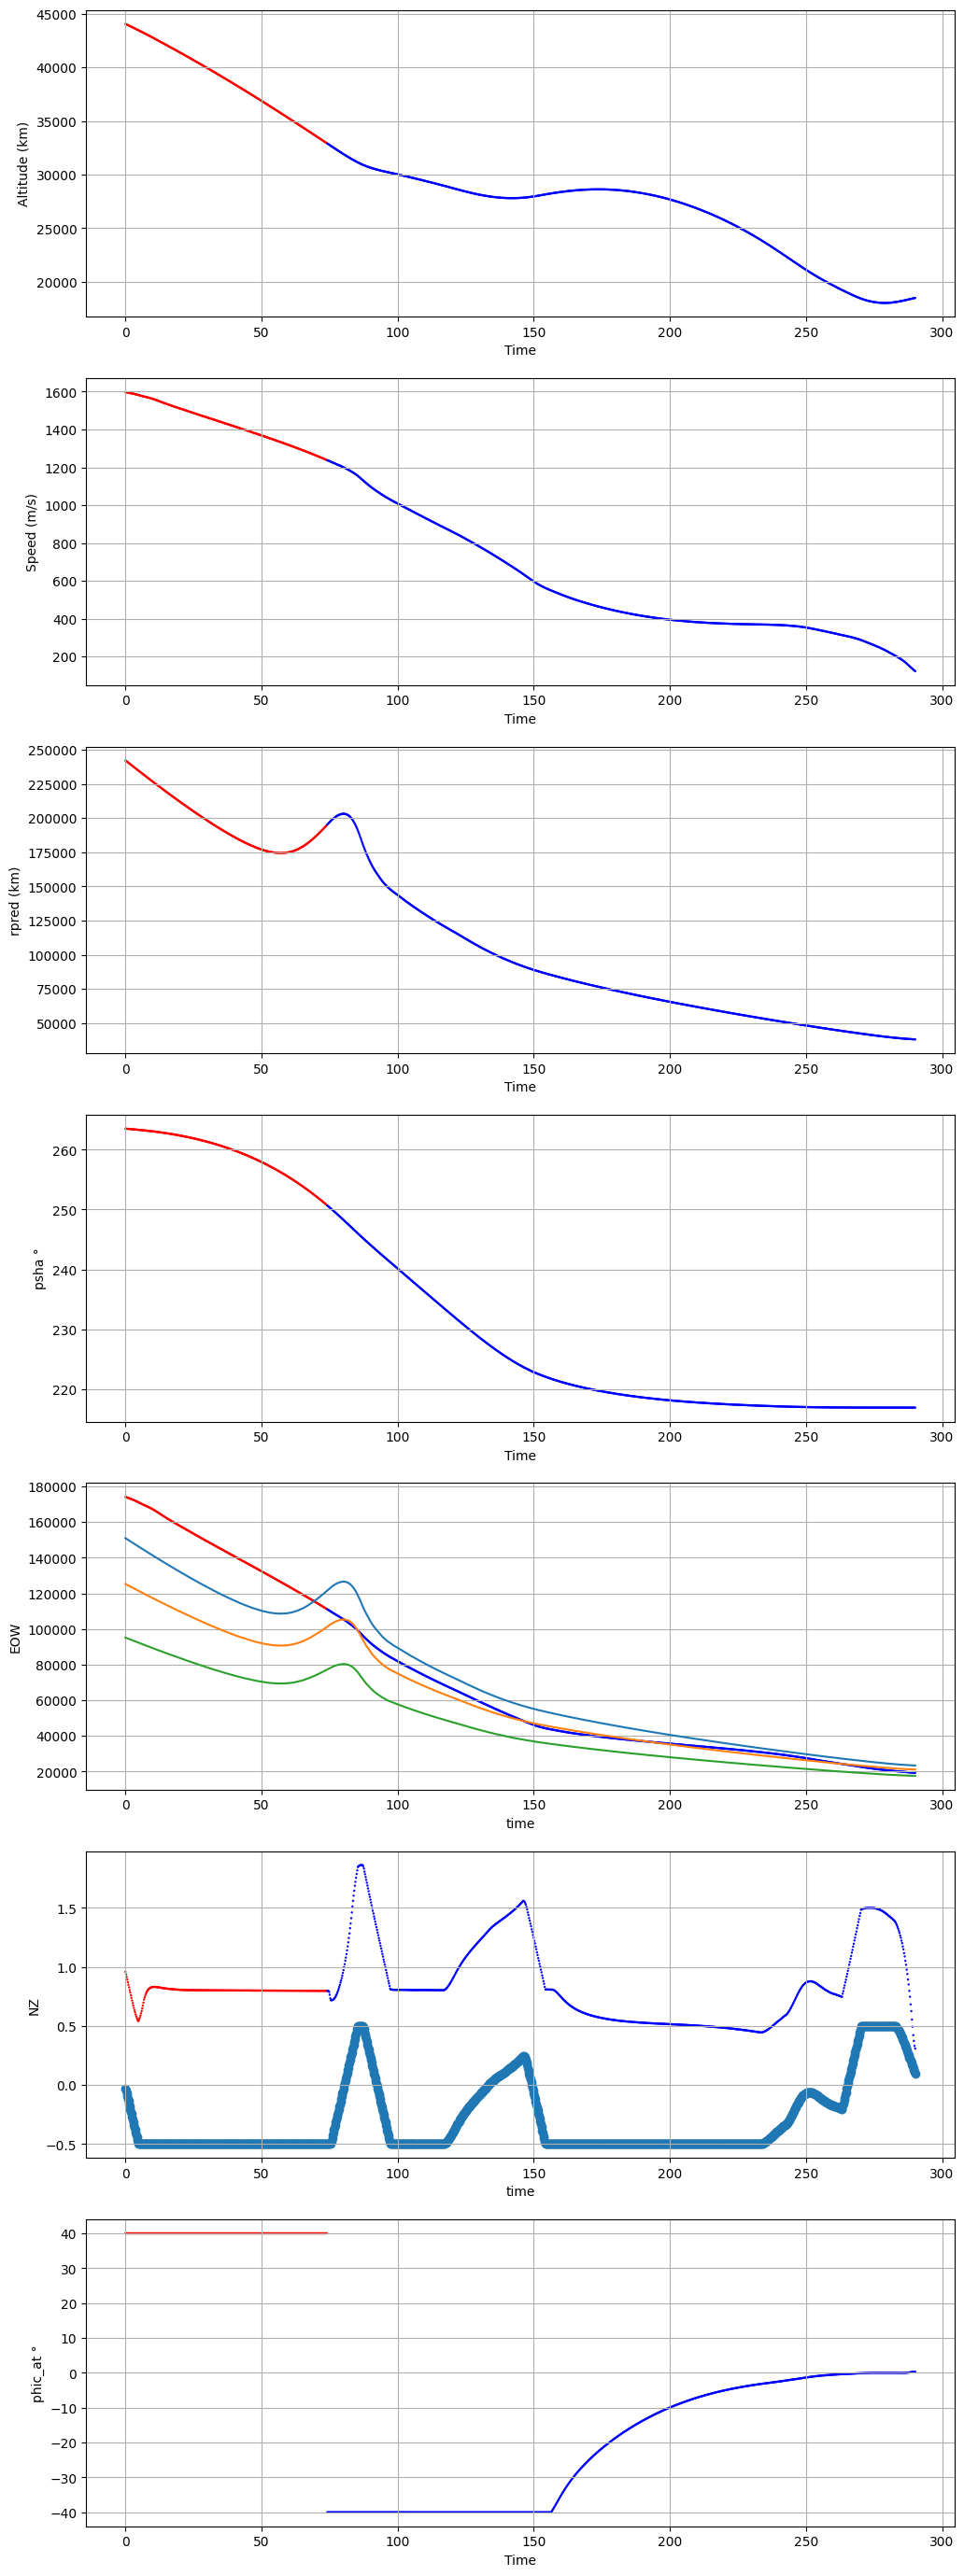

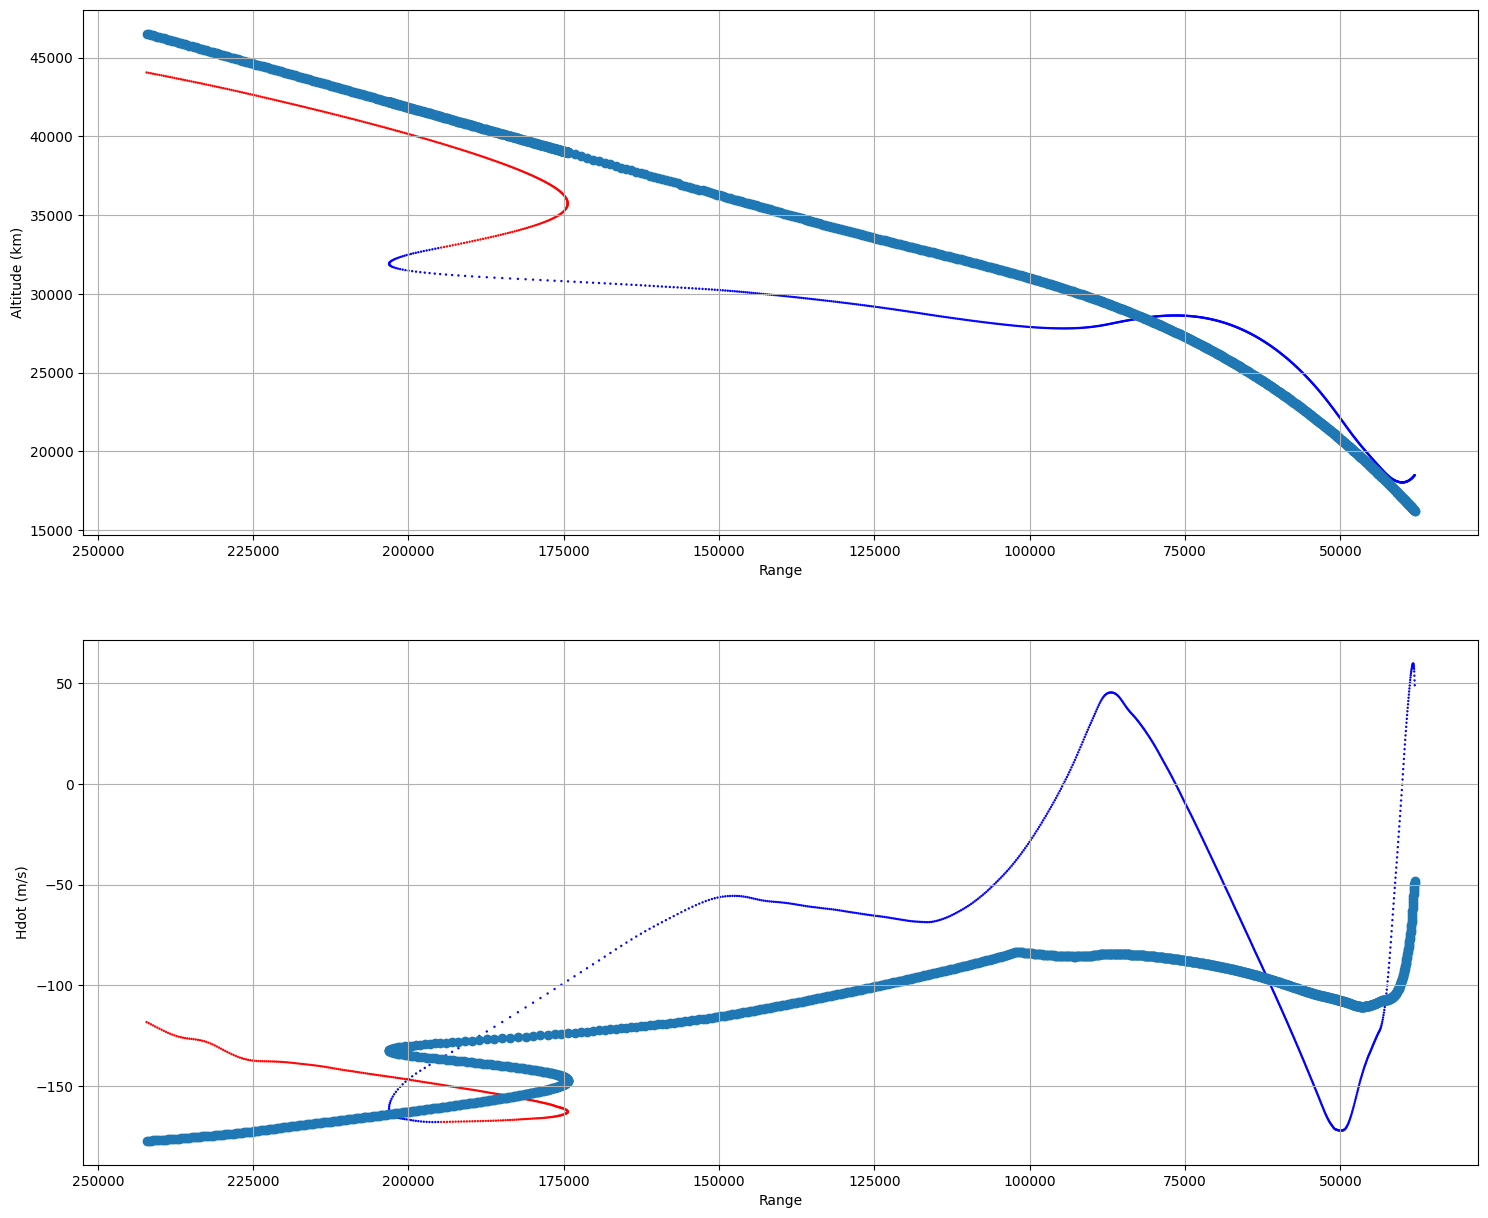

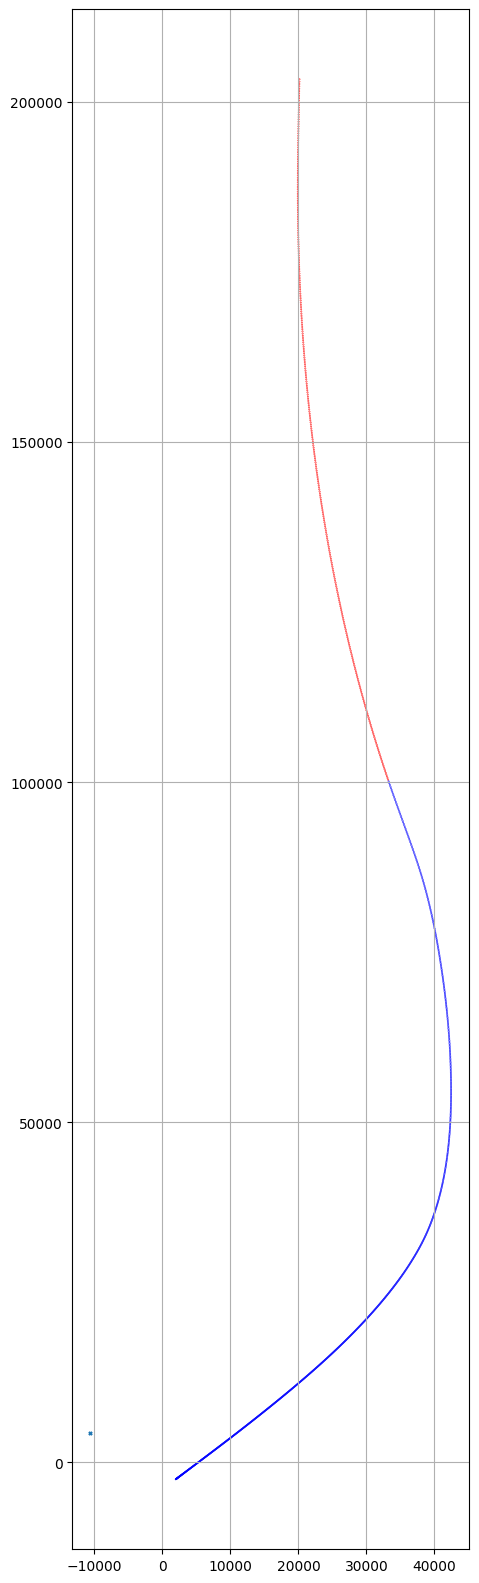

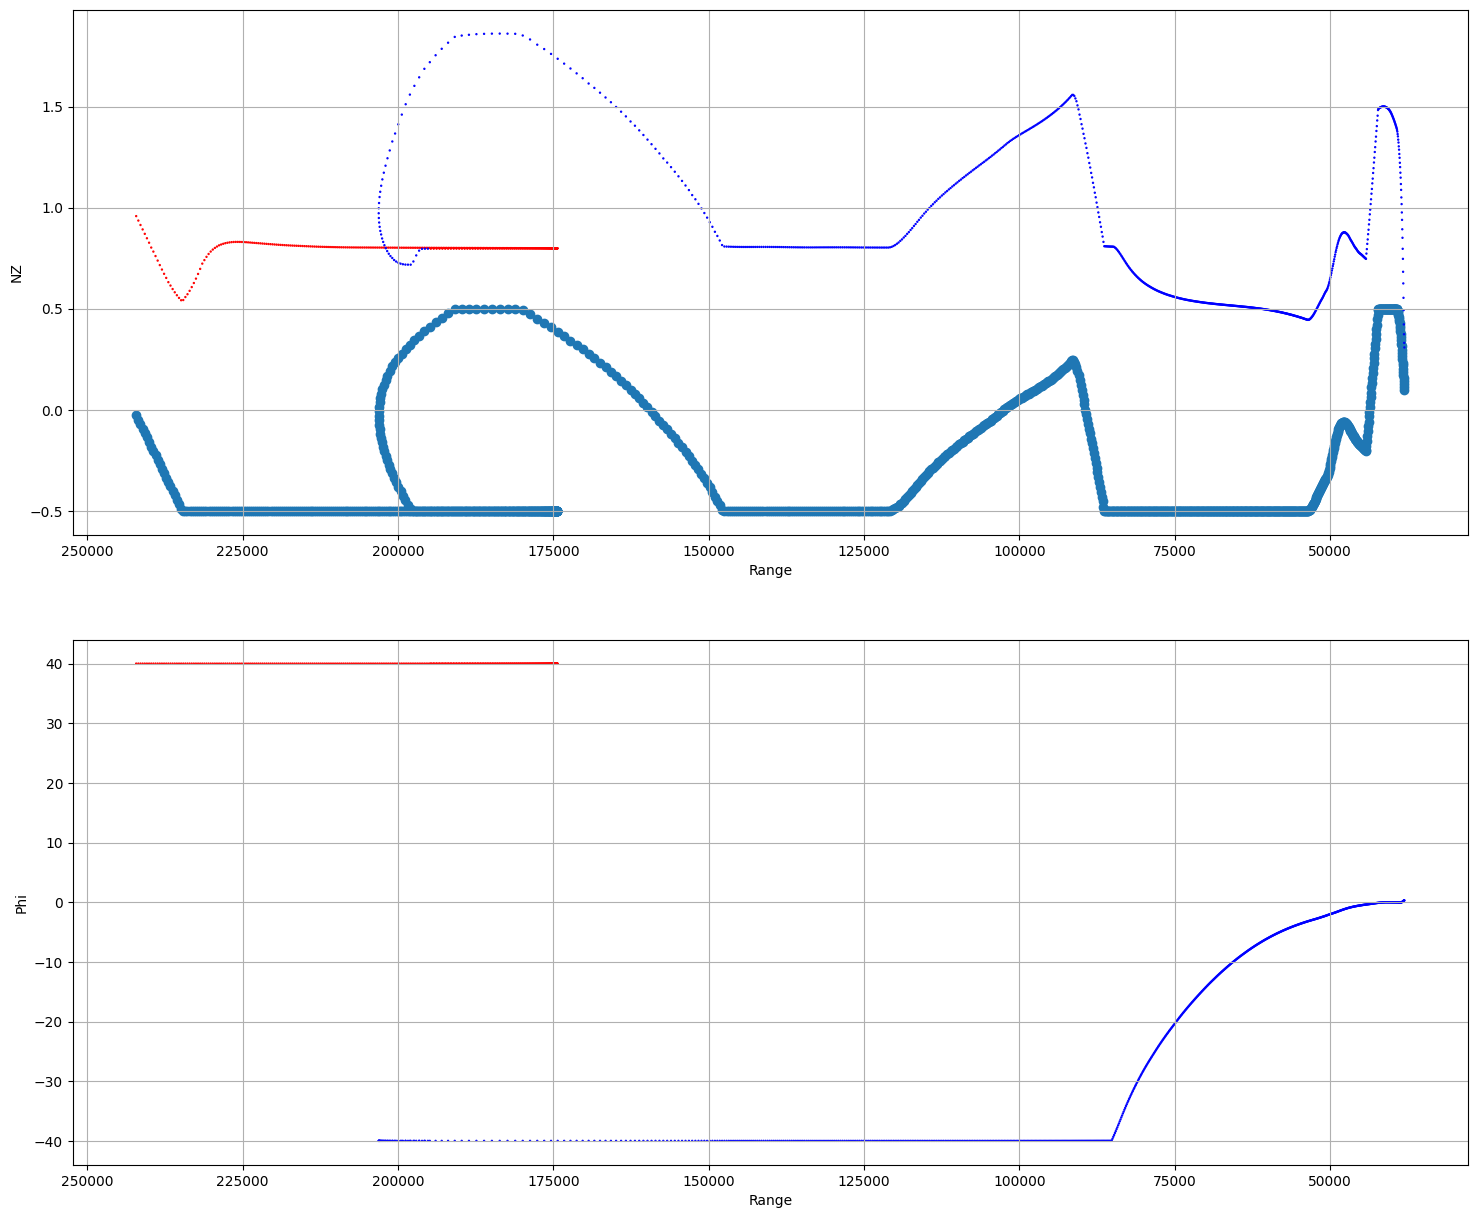

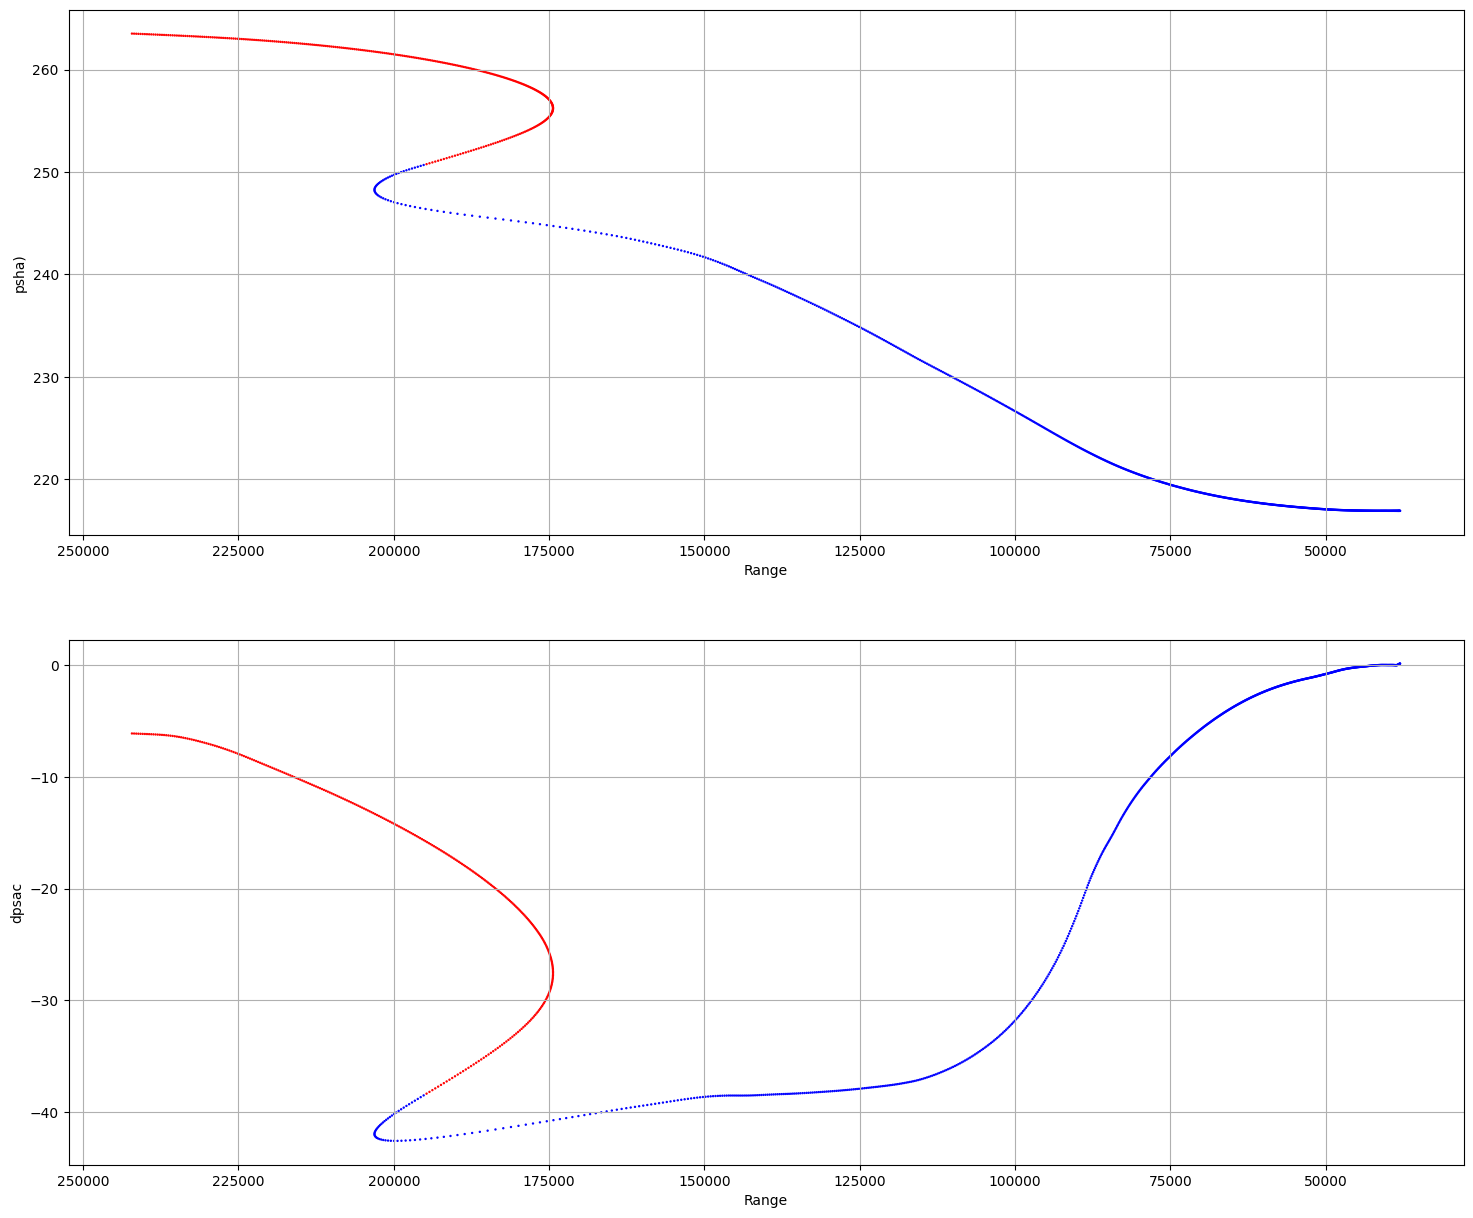

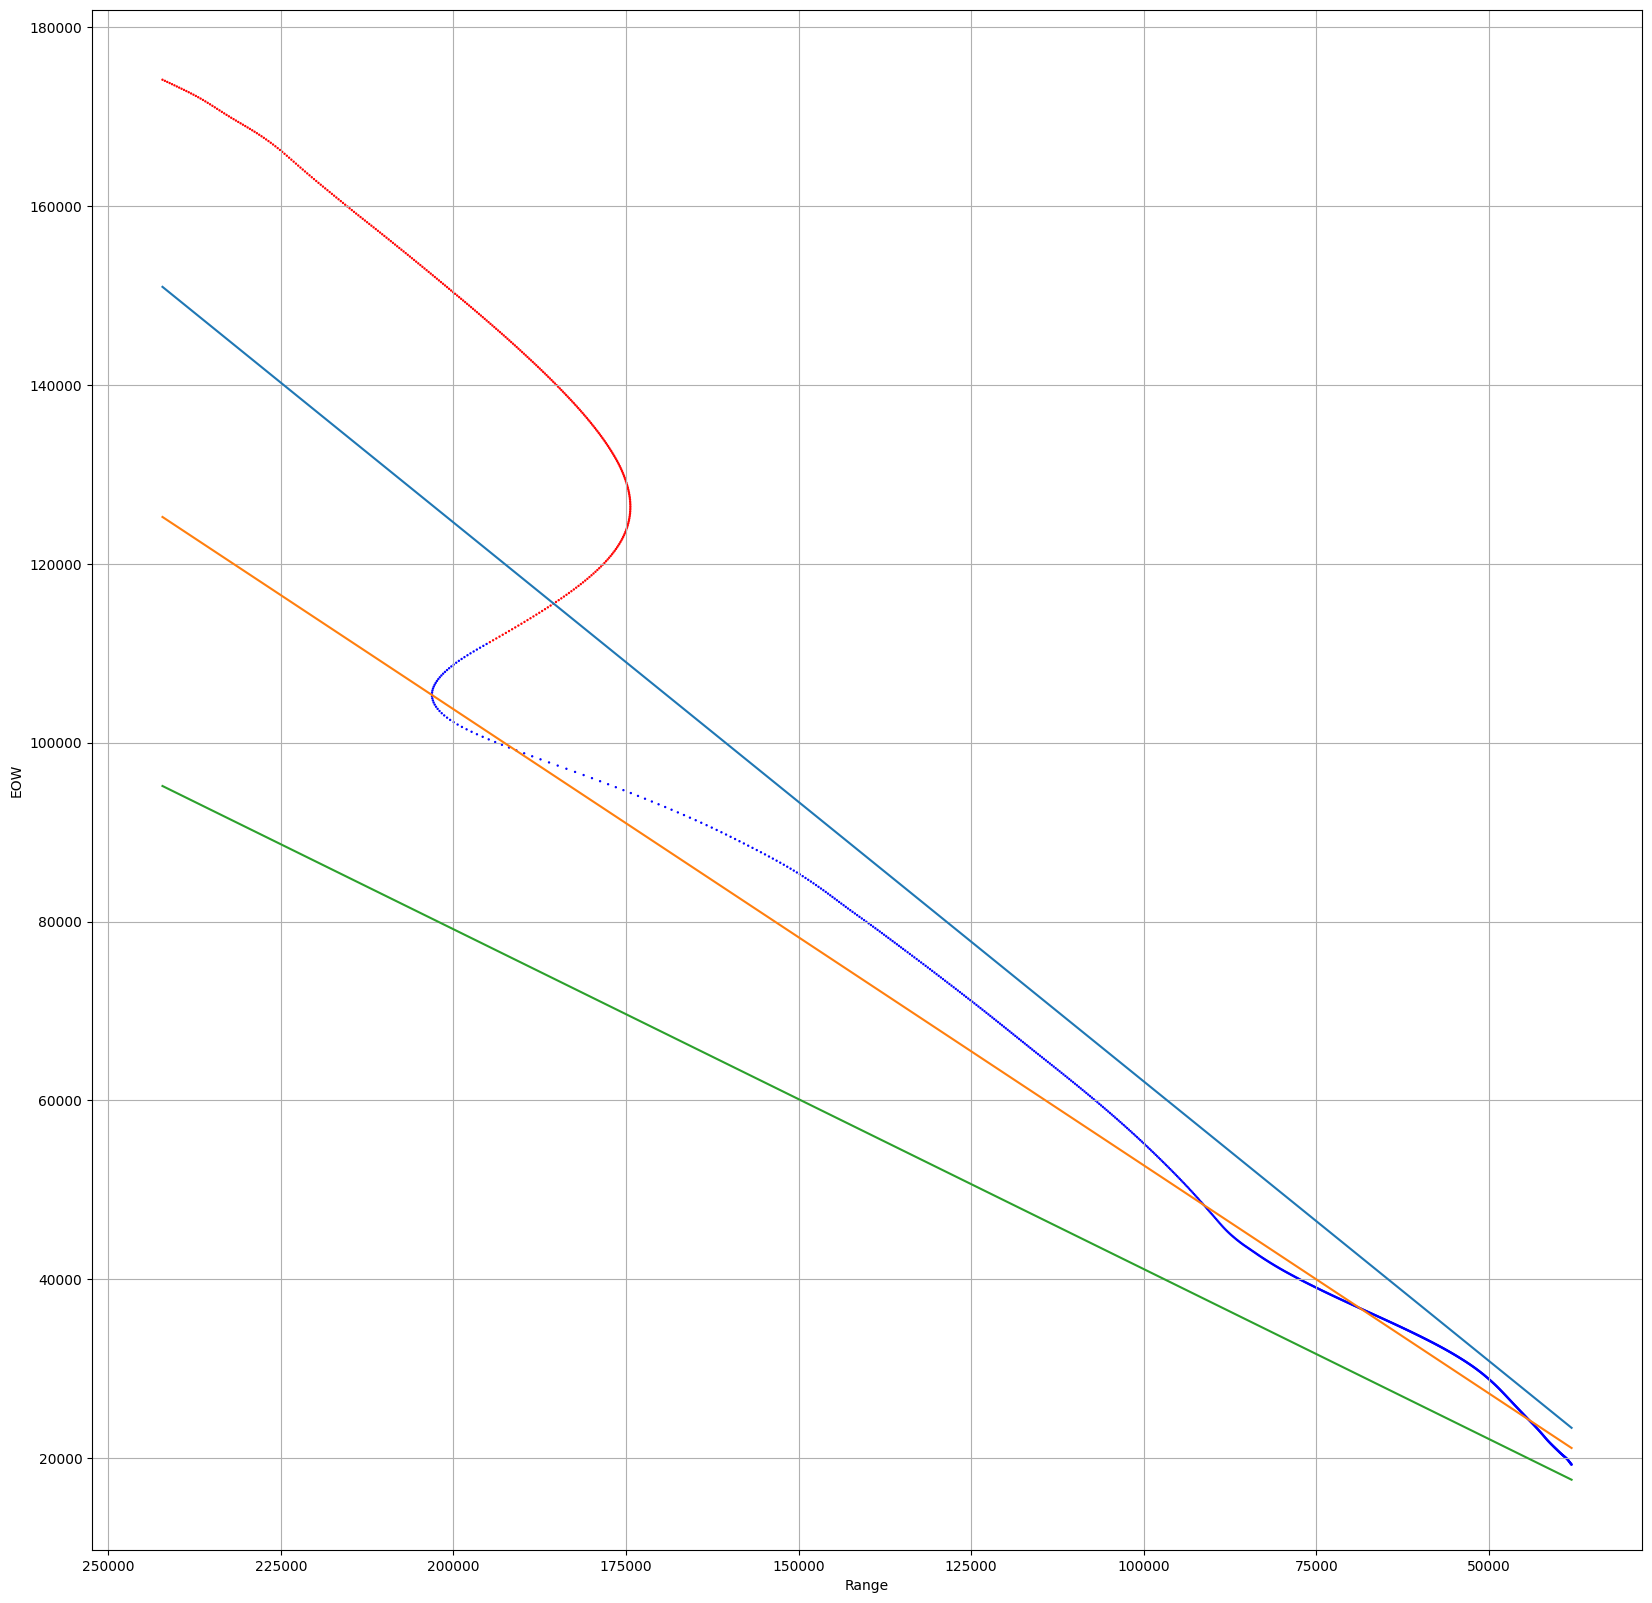

In [405]:
def taem_plots(data):
    
    

    
    fig_1, ax_1 = plt.subplots(nrows=7, ncols=1, figsize=(12, 35))

    plt_ = ax_1[0]
    plt_.scatter(data['time'], data['alt'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Time')
    plt_.set_ylabel('Altitude (km)')
    plt_.grid()

    plt_ = ax_1[1]
    plt_.scatter(data['time'], data['speed'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Time')
    plt_.set_ylabel('Speed (m/s)')
    plt_.grid()
    
    plt_ = ax_1[2]
    plt_.scatter(data['time'], data['rpred'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Time')
    plt_.set_ylabel('rpred (km)')
    plt_.grid()
    
    plt_ = ax_1[3]
    plt_.scatter(data['time'], data['psha'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Time')
    plt_.set_ylabel('psha °')
    plt_.grid()
    
    
    plt_ = ax_1[4]
    plt_.scatter(data['time'], data['eow'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.plot(data['time'], data['es'])
    plt_.plot(data['time'], data['en'])
    plt_.plot(data['time'], data['emep'])
    

    plt_.set_xlabel('time')
    plt_.set_ylabel('EOW')
    plt_.grid()

    plt_ = ax_1[5]
    plt_.scatter(data['time'], data['nzc'])
    plt_.scatter(data['time'], data['nztotal'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('time')
    plt_.set_ylabel('NZ')
    plt_.grid()
    
    plt_ = ax_1[6]
    plt_.scatter(data['time'], data['phic_at'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Time')
    plt_.set_ylabel('phic_at °')
    plt_.grid()
    

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

    plt_ = ax[0]
    plt_.scatter(data['rpred'], data['alt'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.scatter(data['rpred'], data['alt'] + data['herror'])

    plt_.set_xlabel('Range')
    plt_.set_ylabel('Altitude (km)')
    plt_.grid()

    plt_.invert_xaxis()

    plt_ = ax[1]
    plt_.scatter(data['rpred'], data['hdot'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.scatter(data['rpred'], data['hdref'])

    plt_.set_xlabel('Range')
    plt_.set_ylabel('Hdot (m/s)')
    plt_.grid()

    plt_.invert_xaxis()
    
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

    plt_ = ax
    plt_.scatter(data['x'], data['y'], s=0.1, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    
    plt_.scatter(-10590.456, 4267.2, s=5, marker='x')
    
    plt_.set_aspect('equal')

    plt_.grid()
    
    
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

    plt_ = ax[0]
    plt_.scatter(data['rpred'], data['nzc'])
    plt_.scatter(data['rpred'], data['nztotal'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Range')
    plt_.set_ylabel('NZ')
    plt_.grid()

    plt_.invert_xaxis()
    
    
    plt_ = ax[1]
    plt_.scatter(data['rpred'], data['phic_at'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Range')
    plt_.set_ylabel('Phi')
    plt_.grid()

    plt_.invert_xaxis()
    
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

    plt_ = ax[0]
    plt_.scatter(data['rpred'], data['psha'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Range')
    plt_.set_ylabel('psha)')
    plt_.grid()

    plt_.invert_xaxis()
    
    plt_ = ax[1]
    plt_.scatter(data['rpred'], data['dpsac'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Range')
    plt_.set_ylabel('dpsac')
    plt_.grid()

    plt_.invert_xaxis()
    
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
    
    plt_ = ax
    plt_.scatter(data['rpred'], data['eow'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.plot(data['rpred'], data['es'])
    plt_.plot(data['rpred'], data['en'])
    plt_.plot(data['rpred'], data['emep'])
    

    plt_.set_xlabel('Range')
    plt_.set_ylabel('EOW')
    plt_.grid()

    plt_.invert_xaxis()
    
    
    
taem_plots(data_taem)